<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Make-nicer-plots" data-toc-modified-id="Make-nicer-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Make nicer plots</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Split-users-into-groups-(2-distinct-dataframes)" data-toc-modified-id="Split-users-into-groups-(2-distinct-dataframes)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Split users into groups (2 distinct dataframes)</a></span></li><li><span><a href="#Group-by-retention" data-toc-modified-id="Group-by-retention-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Group by retention</a></span></li><li><span><a href="#Plot-retention-for-each-group-to-see-differences" data-toc-modified-id="Plot-retention-for-each-group-to-see-differences-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plot retention for each group to see differences</a></span></li></ul></div>

# Retention by days

### Import libraries

In [1]:
import pandas as pd # used for data storage
import numpy as np # used for data calculations

import matplotlib.pyplot as plt # used for plots
# plots to be shown
%matplotlib inline 

from PIL import Image
import requests
from io import BytesIO
from highlight_text import htext

pd.set_option('display.max_columns', 500) # maximum number of columns to be shown
pd.set_option('display.max_rows', 500) # maximum number of rows to be shown

### Make nicer plots

In [17]:
text_color = "w"
background = "#0e2058"
plt.rcParams['figure.facecolor'] = background
plt.rcParams['axes.facecolor'] = background
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['figure.titleweight'] = "bold" 
plt.rcParams['figure.figsize'] = (12, 6)

plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color
plt.rcParams["legend.facecolor"] = background
plt.rcParams["legend.frameon"] = False
plt.rcParams["axes.labelweight"] = "bold" 
plt.rcParams["axes.labelcolor"] = text_color 
plt.rcParams["axes.labelsize"] = 14 
plt.rcParams["font.fantasy"] = "Charcoal" 
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = text_color

g1_color = "#f2c641"
g2_color = "#9932CC"
diff_color = "#02faee"

def pretty_plot(url): 
    # adding logo
    ax2 = fig.add_axes([0.02, 0.96, 0.15, 0.15])
    ax2.axis("off")
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    ax2.imshow(img)

    s = "Heroic - AB test - <Retention by days>"
    htext.fig_htext(s, 0.15, 1.02, highlight_colors="#02faee", highlight_weights=["bold"],
                   string_weight="bold", fontsize=22, color=text_color)


    # remove top and right spines, color bottom and left
    spines = ["top", "right", "bottom", "left"]
    for s in spines:
        if s in ["top", "right"]:
            axs.spines[s].set_visible(False)
        else:
            axs.spines[s].set_color(text_color)

### Load data

In [3]:
users_retention_rate = pd.read_csv("users_retention_rate.csv")

### Split users into groups (2 distinct dataframes)

In [4]:
group_1 = users_retention_rate[users_retention_rate['group'] == "group_1"].drop("group", axis=1)
group_2 = users_retention_rate[users_retention_rate['group'] == "group_2"].drop("group", axis=1)

### Group by retention

In [5]:
g1_retention = group_1.groupby("retention", as_index=False).agg("dau").sum()
g1_retention = g1_retention.rename(columns={'retention': 'day', 'dau': 'retention'})
g2_retention = group_2.groupby("retention", as_index=False).agg("dau").sum()
g2_retention = g2_retention.rename(columns={'retention': 'day', 'dau': 'retention'})

In [6]:
def calc_rolling_ret(n):
    g1_ret = g1_retention[g1_retention['day'] >= n]['retention'].sum()
    g2_ret = g2_retention[g2_retention['day'] >= n]['retention'].sum()
    return g1_ret, g2_ret

In [7]:
days = []
g1_rets = []
g2_rets = []
for i in range(1, 12):
    days.append(i)
    res = calc_rolling_ret(i)
    g1_rets.append(res[0])
    g2_rets.append(res[1])
days = np.array(days)

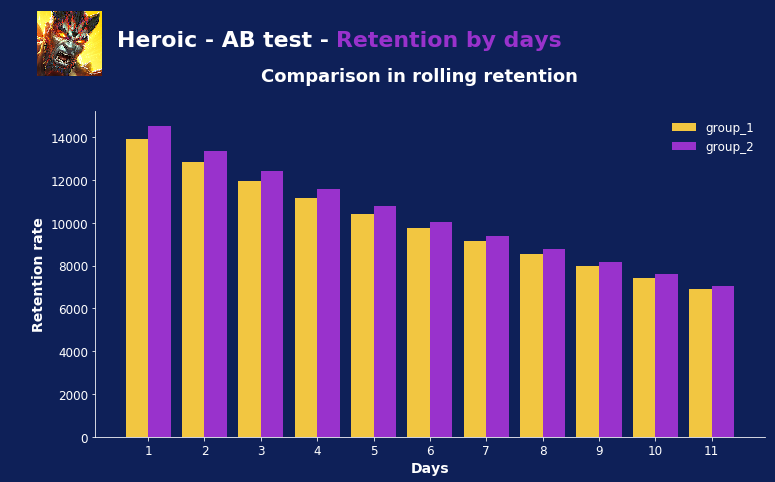

In [8]:
fig, axs = plt.subplots()
w = 0.2
plt.bar(days - w, g1_rets, color=g1_color, label="group_1", width=w*2)
plt.bar(days + w, g2_rets, color=g2_color, label="group_2", width=w*2)
plt.legend()
plt.xticks(days) # set labels manually
#plt.yticks([0, 100, 500, 1000, 1500, 2000, 2500, 3000])
legend = plt.legend()
plt.setp(legend.get_texts(), color=text_color)
plt.xlabel("Days")
plt.ylabel("Retention rate")
fig.suptitle('Comparison in rolling retention', color=text_color)
#plt.legend(loc="upper right")

pretty_plot(url="https://dl.memuplay.com/new_market/img/com.nordeus.heroic.icon.2019-07-04-11-12-51.png")

### Plot retention for each group to see differences

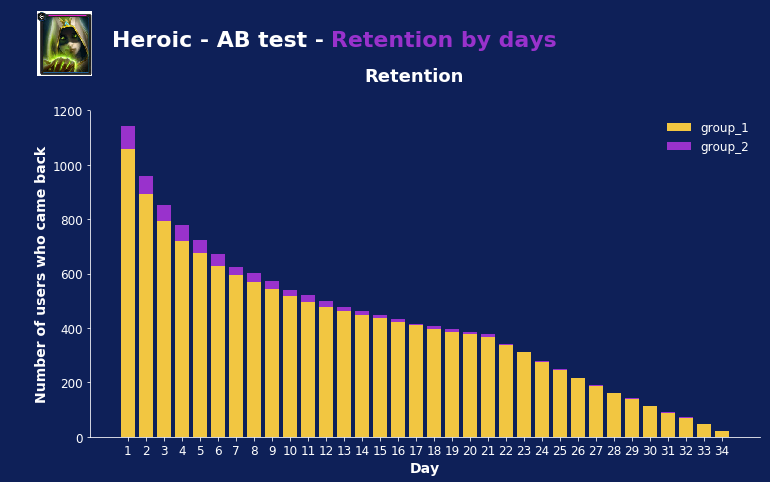

In [9]:
fig, axs = plt.subplots()
plt.bar(g1_retention[1:].day, g1_retention[1:].retention, color=g1_color, label="group_1")
plt.bar(g1_retention[1:].day, g2_retention[1:].retention - g1_retention[1:].retention, bottom=g1_retention[1:].retention, color=g2_color,
        label="group_2")
plt.legend()
plt.xticks(g1_retention[1:].day) # set labels manually
#plt.yticks([0, 100, 500, 1000, 1500, 2000, 2500, 3000])
legend = plt.legend()
plt.setp(legend.get_texts(), color=text_color)
plt.xlabel("Day")
plt.ylabel("Number of users who came back")
fig.suptitle('Retention', color=text_color)

pretty_plot(url="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9bWY_abNPfJigkXY9UpBjkjdYNeZ9SNyerg&usqp=CAU")

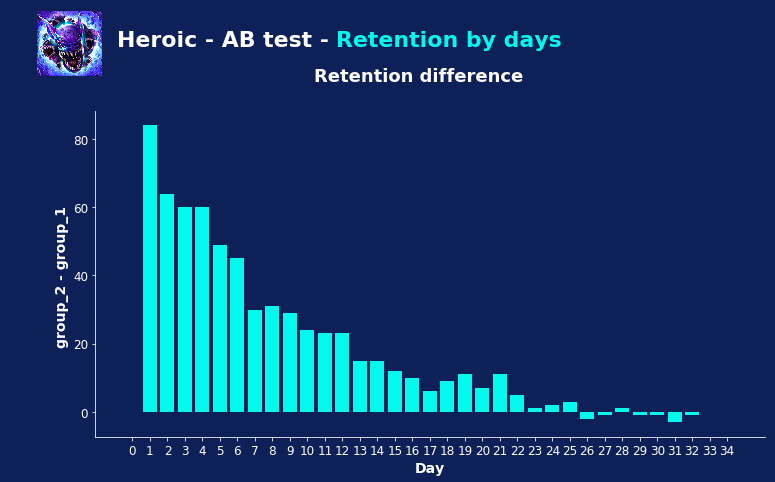

In [18]:
fig, axs = plt.subplots()
plt.bar(g1_retention.index, g2_retention.retention - g1_retention.retention, color=diff_color)
plt.xticks(g1_retention.index) 
plt.xlabel("Day")
plt.ylabel("group_2 - group_1 ")
fig.suptitle('Retention difference', color=text_color)

pretty_plot(url="https://lh3.googleusercontent.com/o_NRs0AhOXGTNY8BVQ7JDq5buQgRGM33EM_fxemSDrNnU3YUofNHjIqriUH-MjIWDANt")